In [142]:
#importing the essential libraries.
import pandas as pd
import matplotlib.pyplot as plt

#loading the data to data frame.
data = pd.read_excel('Heart_Disease_Prediction.xlsx')
df = data.copy()
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [143]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [144]:
#Replacing the values in column 1.
df['Sex'] = df['Sex'].replace({0: 'female', 1: 'male'})
df.head(2)


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,male,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,female,3,115,564,0,2,160,0,1.6,2,0,7,Absence


In [145]:
df.groupby(['Heart Disease']).count()



,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Heart Disease,,,,,,,,,,,,,
Absence,150,150,150,150,150,150,150,150,150,150,150,150,150
Presence,120,120,120,120,120,120,120,120,120,120,120,120,120


In [146]:
df.groupby(['Sex']).count()


,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
Sex,,,,,,,,,,,,,
female,87,87,87,87,87,87,87,87,87,87,87,87,87
male,183,183,183,183,183,183,183,183,183,183,183,183,183


In [147]:
#Grouping to obtain the precise count.
grp = df.groupby(['Sex', 'Heart Disease']).count()
grp.head()


Age  Chest pain type   BP  Cholesterol  FBS over 120  \
Sex    Heart Disease                                                         
female Absence         67               67   67           67            67   
       Presence        20               20   20           20            20   
male   Absence         83               83   83           83            83   
       Presence       100              100  100          100           100   

                      EKG results  Max HR  Exercise angina  ST depression  \
Sex    Heart Disease                                                        
female Absence                 67      67               67             67   
       Presence                20      20               20             20   
male   Absence                 83      83               83             83   
       Presence               100     100              100            100   

                      Slope of ST  Number of vessels fluro  Thallium  
Sex    Heart Disease                                                  
female Absence                 67                       67        67  
       Presence                20                       20        20  
male   Absence                 83                       83        83  
       Presence               100                      100       100

In [148]:
#Grouping the needed columns.
grp = grp[['Age']]
grp


Age
Sex    Heart Disease     
female Absence         67
       Presence        20
male   Absence         83
       Presence       100

<AxesSubplot:xlabel='Sex,Heart Disease'>

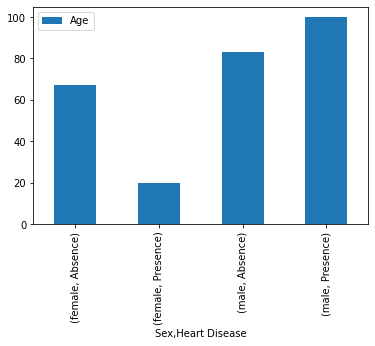

In [149]:
grp.plot.bar(stacked=True)



In [150]:
#Changing name of column 2 to reflect in visualization. 
grp = grp.rename(columns={'Age': 'Count'})


In [151]:
grp.head()


Count
Sex    Heart Disease       
female Absence           67
       Presence          20
male   Absence           83
       Presence         100

In [152]:
sd = grp.reset_index()
sd


,Sex,Heart Disease,Count
0,female,Absence,67
1,female,Presence,20
2,male,Absence,83
3,male,Presence,100


In [153]:
sd["Sex"].replace({0: "female", 1: "male"})


0    female
1    female
2      male
3      male
Name: Sex, dtype: object

In [154]:
sd.head()


,Sex,Heart Disease,Count
0,female,Absence,67
1,female,Presence,20
2,male,Absence,83
3,male,Presence,100


<AxesSubplot:>

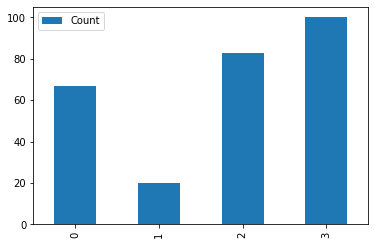

In [155]:
#Visualizing using bar-plot.
sd.plot.bar(stacked=True)


<AxesSubplot:xlabel='Sex,Heart Disease'>

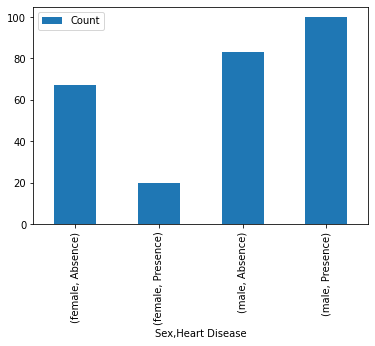

In [156]:
#Visualizing using bar-plot.
grp.plot.bar(stacked=True)


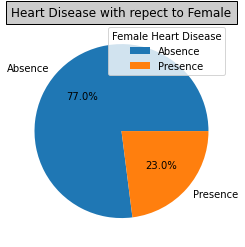

In [164]:
#Visualizing using pie chart (Female analysis).
female = df.groupby("Sex").get_group("female")

labels = female['Heart Disease'].unique()
sizes = female.groupby("Heart Disease").size()

plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.title("Heart Disease with repect to Female", bbox={'facecolor': '0.8', 'pad': 5})
plt.legend(title= "Female Heart Disease")
plt.show()

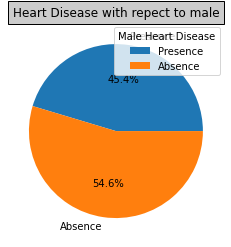

In [168]:
#Visualizing by piechart (Male analysis).
male = df.groupby("Sex").get_group("male")

labels = male['Heart Disease'].unique()
sizes = male.groupby("Heart Disease").size()

plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.title("Heart Disease with repect to male", bbox={'facecolor': '0.8', 'pad': 5})
plt.legend(title="Male Heart Disease")
plt.show()
